# New-York city Airbnb data
## This project is to make exploritary analisys and answer following questions:
- What can we learn about different hosts and areas?
- How listing are distributed depending on parameters?
- How the price depends on different parameters?

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
df = pd.read_csv('nyc_airbnb.csv')

In [247]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From this we see that our dataset contains 16 columns and almost 49000 rows that shows us the name, location, room type, price and other information, which allows us to make an analisys.
Some values are missing, which means that data cleaning process is required. 

In [249]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Amount of missing values in columns 'name' and 'host_name' is insignifficant, while columns 'last_review' and 'reviews_per_month' contain more than 10000 and we have to handle these values. Prior to that, it is necessary to understand the nature of missing values. 

In [250]:
df[df['last_review'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


The reason is simply there are no reviews for this place and thus there are no date of last review and no reviews_per_month. We can just fill those values with zeros. 

In [251]:
df.fillna({'last_review' : 0, 'reviews_per_month' : 0}, inplace=True)

In [252]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Remaining columns with missing values are not required for our analisys, so we have better to get rid of them. 

In [253]:
df.dropna(axis=1, inplace=True)

Let's see the distribution of our parameters to get a general understanding of the data.         

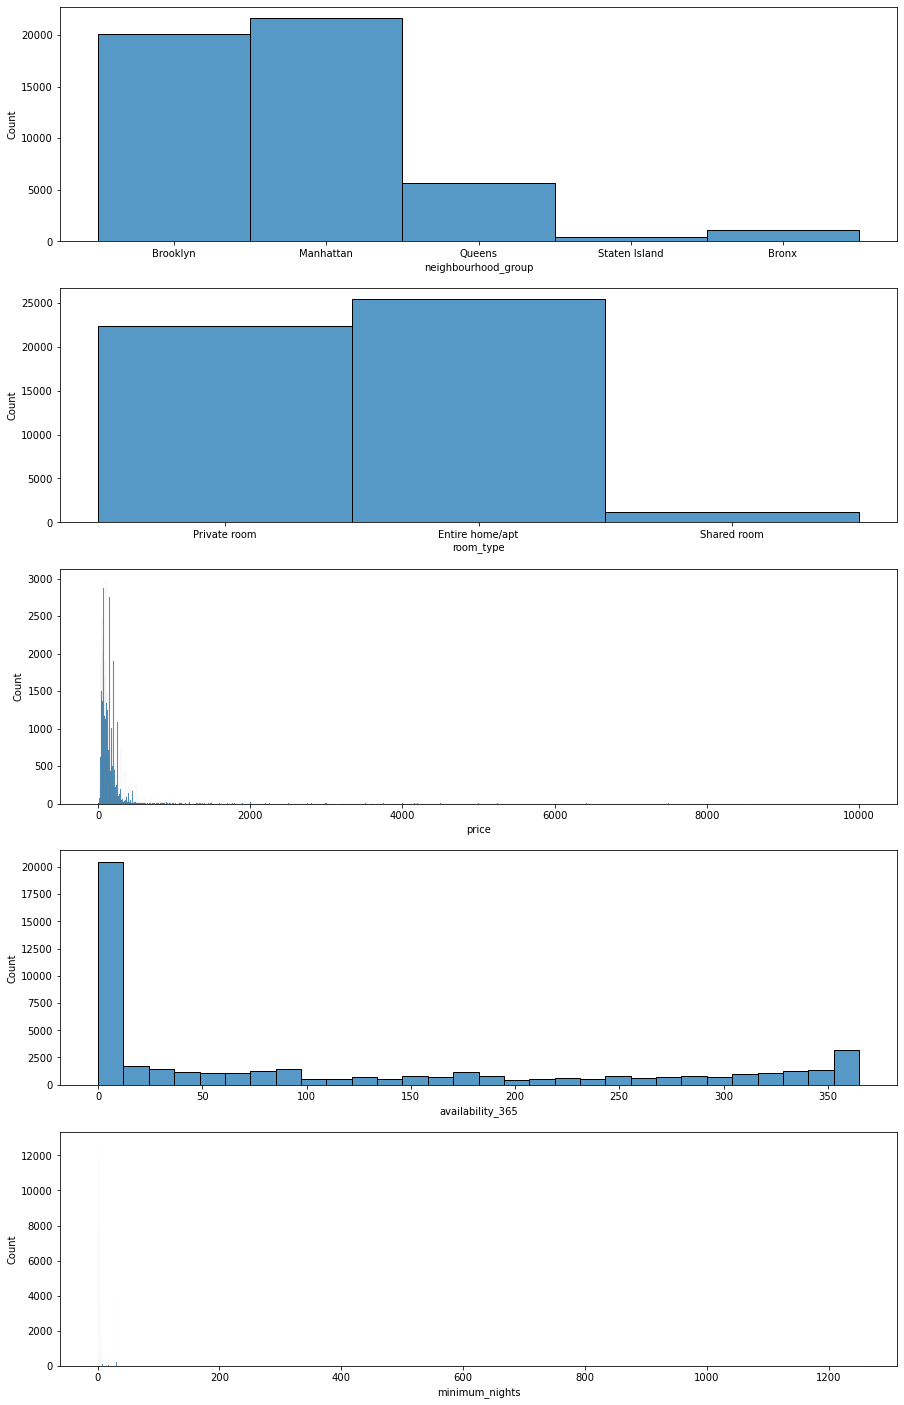

In [254]:
params = ['neighbourhood_group', 'room_type', 'price', 'availability_365', 'minimum_nights']
fig, ax = plt.subplots(nrows=len(params), ncols=1, figsize=(15,25), sharex=False, sharey=False)
for i, parameter in enumerate(params):
    sns.histplot(data=df, x=parameter, ax=ax[i], label = params[i])

From above histogram we can see the following:
- Most of listings are located in Brooklyn and Manhattan 
- Most of listing are entire house or private room, when shared rooms are not very common
- Almost all the listing costs below $500 per nigth, but there are outliers.
- There are listing with too much value of minimum nights. They have to be cleaned.

In [255]:
df = df[(df['minimum_nights'] <= 365) & (df['price'] != 0)]

We deleted the rows, where price is zero as well as rows, where minimal living period is more than a year, since such data does not make sense.

Now our data is free of invalid values and let's see the price distribution closely.

In [256]:
df.price.describe()

count    48870.000000
mean       152.759402
std        240.199363
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [257]:
df.price.quantile(0.95)

355.0

In [258]:
df.price.median()

106.0

- 95% of all listing costs below 355 USD
- Mean price is 152.7 USD
- Median price is 106 USD, which is much more representative figure, since outliers make a noise here

To get rid of this noise, we will drop all the rows with price more above 500 USD.

In [259]:
df[df['price'] > 500].shape[0] / df.shape[0] * 100

2.136279926335175

2% of our listings will be dropped

In [260]:
df = df[df['price'] <= 500]

In [261]:
df.price.describe()

count    47826.000000
mean       131.559047
std         88.049199
min         10.000000
25%         68.000000
50%        101.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

After dropping the outliers, distribution will be following:

<AxesSubplot:xlabel='price', ylabel='Count'>

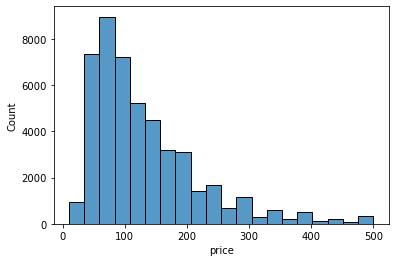

In [262]:
sns.histplot(data=df, x='price', bins=20)

And we can see the map of neighbourhood group:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

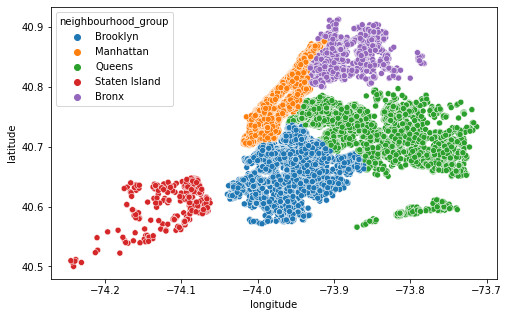

In [263]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='longitude',y='latitude',hue='neighbourhood_group')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

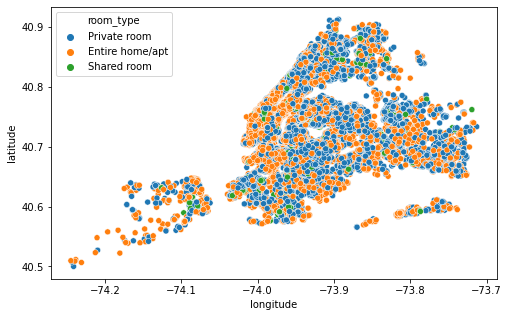

In [264]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='longitude',y='latitude',hue='room_type')

This shows us that all the types of listings are distributed uniformly in the city, but on Manhattan there are more listings for Entire home.

Now let's look for patterns and trends. We will look how the price changes depending on different factors. 

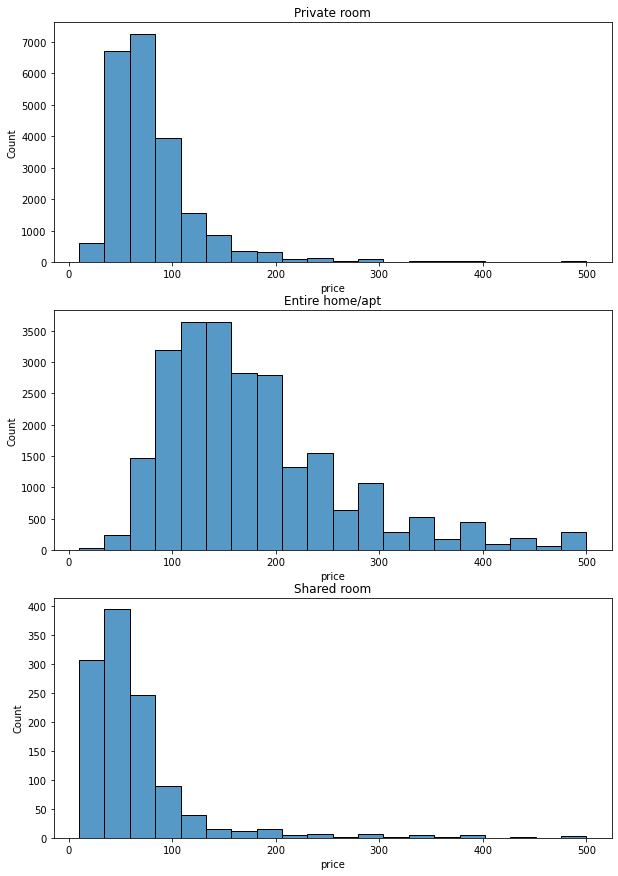

In [265]:
r_types = df.room_type.unique()
fig, ax = plt.subplots(3,1, figsize=(10,15))
for i, r_type in enumerate(r_types):
    sns.histplot(data=df, x=df[df['room_type'] == r_type]['price'], ax=ax[i], bins=20)
    ax[i].title.set_text(r_types[i])

We see how price is distributed depending the room type, but y-axis are different on above plots. To make it more readable, let's put all of them on one canvas with common axes. 

<AxesSubplot:xlabel='price', ylabel='Count'>

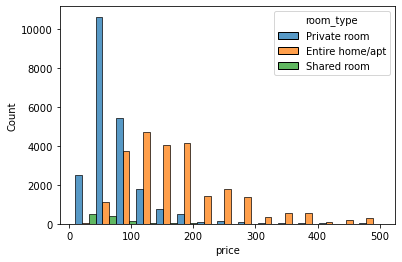

In [266]:
sns.histplot(data=df, x='price', hue='room_type', bins=15, multiple='dodge')

In [267]:
df.groupby('room_type').median()[['price']]

,price
room_type,
Entire home/apt,158.0
Private room,70.0
Shared room,45.0


Now it is clear that:
- Cheapest type is shared room
- Privite room can be same price as shared room, but some of them are much more expensive
- There are a few cheap entire houses but, most of them costs more than 100 USD per night. Price distribution of this type is more uniform, which means that for each price, there are more uniform amount of listings. 

<AxesSubplot:xlabel='price', ylabel='Count'>

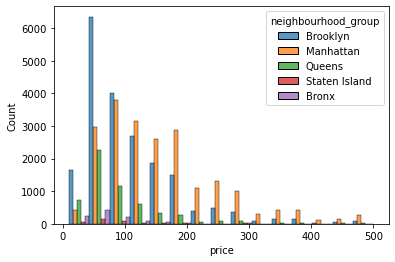

In [268]:
sns.histplot(data=df, x='price', hue='neighbourhood_group', bins=15, multiple='dodge')

In [269]:
df.groupby('neighbourhood_group').median()[['price']]

,price
neighbourhood_group,
Bronx,65.0
Brooklyn,90.0
Manhattan,145.0
Queens,75.0
Staten Island,75.0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

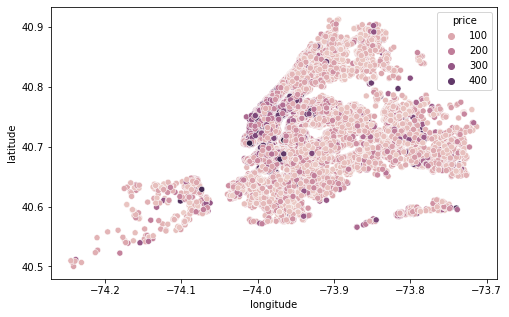

In [270]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df.price < 500], x='longitude',y='latitude',hue='price')

This plot confirms that the most expensive listings are located in Manhattan. The reason migth be that this area is considered the most prestigious, and also because mainly is Entire houses, which are more expensive than other types.